## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
y_train.shape

(60000,)

In [55]:
x_test.shape

(10000, 28, 28)

In [56]:
y_test.shape

(10000,)

### Find dimensions of an image in the dataset

In [57]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


### Import the necessary layers from keras to build the model

In [0]:
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [62]:
# Define model
model = keras.models.Sequential()

    # 1st Conv Layer
model.add(keras.layers.Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(keras.layers.Activation('relu'))

    # 2nd Conv Layer
model.add(keras.layers.Convolution2D(32, 3, 3))
model.add(keras.layers.Activation('relu'))

    # Fully Connected Layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128))
model.add(keras.layers.Activation('relu'))
    
       # Prediction Layer
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))

    # Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
       # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

    # Train the model2
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test),callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.3689 - acc: 0.8666 - val_loss: 0.3042 - val_acc: 0.8881
Epoch 2/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.2311 - acc: 0.9144 - val_loss: 0.2633 - val_acc: 0.9047
Epoch 3/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.1719 - acc: 0.9366 - val_loss: 0.2512 - val_acc: 0.9143
Epoch 4/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.1203 - acc: 0.9550 - val_loss: 0.2657 - val_acc: 0.9134
Epoch 5/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.0797 - acc: 0.9702 - val_loss: 0.3335 - val_acc: 0.9154
Epoch 6/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.0532 - acc: 0.9806 - val_loss: 0.3567 - val_acc: 0.9140
Epoch 7/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.0393 - acc: 0.9858 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [63]:
# Define model
model1 = keras.models.Sequential()

    # 1st Conv Layer
model1.add(keras.layers.Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(keras.layers.Activation('relu'))

    # 2nd Conv Layer
model1.add(keras.layers.Convolution2D(32, 3, 3))
model1.add(keras.layers.Activation('relu'))

    # Dropout
model1.add(keras.layers.Dropout(0.25))

  # Max Pooling
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    


    # Fully Connected Layer
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128))
model1.add(keras.layers.Activation('relu'))
    
       # Prediction Layer
model1.add(keras.layers.Dense(10))
model1.add(keras.layers.Activation('softmax'))

    # Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
       # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

    # Train the model2
model1.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.3785 - acc: 0.8640 - val_loss: 0.3031 - val_acc: 0.8841
Epoch 2/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.2450 - acc: 0.9097 - val_loss: 0.2630 - val_acc: 0.9043
Epoch 3/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.1980 - acc: 0.9267 - val_loss: 0.2462 - val_acc: 0.9076
Epoch 4/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.1637 - acc: 0.9391 - val_loss: 0.2221 - val_acc: 0.9215
Epoch 5/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.1342 - acc: 0.9499 - val_loss: 0.2264 - val_acc: 0.9204
Epoch 6/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.1104 - acc: 0.9584 - val_loss: 0.2240 - val_acc: 0.9238
Epoch 7/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.0911 - acc: 0.9659 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

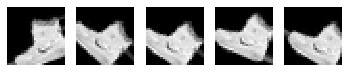

In [65]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [66]:
    model1.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=32),
                        samples_per_epoch=x_train.shape[0],
                        epochs=10,
                        validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
   8/1875 [..............................] - ETA: 33s - loss: 3.5704 - acc: 0.4258

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=10, validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875)`
  """


1875/1875 [==============================] - 34s 18ms/step - loss: 0.6843 - acc: 0.7504 - val_loss: 0.3954 - val_acc: 0.8575
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5113 - acc: 0.8102 - val_loss: 0.3416 - val_acc: 0.8774
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4595 - acc: 0.8301 - val_loss: 0.3262 - val_acc: 0.8825
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4314 - acc: 0.8408 - val_loss: 0.3218 - val_acc: 0.8879
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4104 - acc: 0.8472 - val_loss: 0.3465 - val_acc: 0.8764
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3970 - acc: 0.8529 - val_loss: 0.3367 - val_acc: 0.8813
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3829 - acc: 0.8599 - val_loss: 0.3338 - val_acc: 0.8777
Epoch 8/10
1875/1875 [==============================] - 34s

###  Report the final train and validation accuracy

In [67]:
loss_and_metrics = model1.evaluate(x_test, y_test)
print("test",loss_and_metrics)
loss_and_metrics_train = model1.evaluate(x_train, y_train)
print("train",loss_and_metrics_train)

10000/10000 [==============================] - 1s 89us/step
[0.29506649173498156, 0.892]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
import numpy as np



### **Load CIFAR10 dataset**

In [0]:
(X_train1, y_train), (X_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data

In [0]:
X_train1 = X_train1.astype('float32')
x_test = x_test.astype('float32')
X_train1 /= 255
x_test /= 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen1 = ImageDataGenerator(
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images



### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen1.fit(X_train1)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

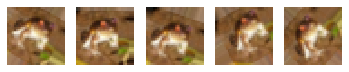

In [73]:
from matplotlib import pyplot as plt
gen = datagen1.flow(X_train1[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()